In [47]:
%cd /content/drive/MyDrive/SpotifyData_Analysis/SpotifyData_Analysis

/content/drive/MyDrive/SpotifyData_Analysis/SpotifyData_Analysis


In [48]:
%ls

README.md                   Spotify_EDA_DecisionTree.ipynb
SongAttri_DecisionTree.png  Spotify_songAttributes.csv


In [49]:
!pip install graphviz

In [50]:
import sklearn
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import imageio
import io
import pydotplus
from scipy import misc

%matplotlib inline

## **Spotify Explotary Data analysis**
  *  ### First we load the data from Spotify_songAttributes
  *  ### create visualization for understand data




## **Importing the Data**




In [51]:
df = pd.read_csv('/content/drive/MyDrive/SpotifyData_Analysis/SpotifyData_Analysis/Spotify_songAttributes.csv')

In [52]:
df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4,0.623,0,First Contact,Twin Moons


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   int64  
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


# Data Cleaning



1.   Dropping Unnamed Column
2.   Cheking NULL Values
3.   Describing the data



In [54]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys


In [55]:
df.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [56]:
df.shape

(2017, 16)

In [57]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [58]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


# Data Analysis

### Top 5 Artists

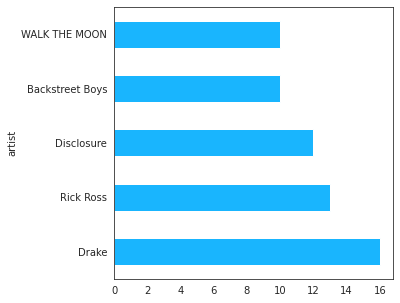

In [59]:
top_artist = df.groupby("artist").count().sort_values(by = "song_title", ascending= False)["song_title"][:5] #change :5 for any top n number
plt.figure(figsize=(5,5))
top_artist.plot.barh()

plt.show()


### Top 5 Loudest Track

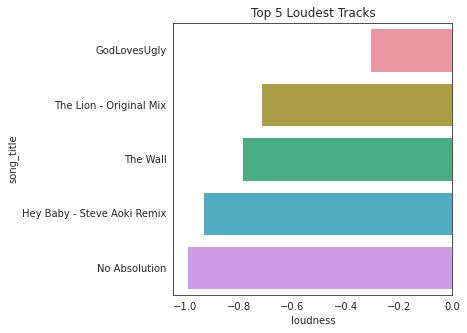

In [60]:
top_loud = df[["loudness", "song_title"]].sort_values(by = "loudness", ascending = False)[:5] #change :5 for any top n number 
plt.figure(figsize=(5,5))
sns.barplot(x="loudness", y= "song_title", data= top_loud)
plt.title("Top 5 Loudest Tracks")
plt.show()


### Top 5 Artist with most danceability song

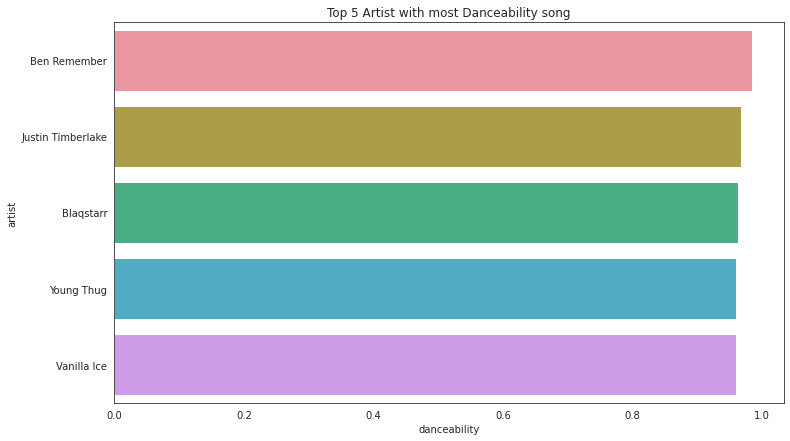

In [61]:
top_dance = df[["danceability", "artist", "song_title"]].sort_values(by = "danceability", ascending = False)[:5] #change :5 for any top n number
plt.figure(figsize= (12,7))
sns.barplot(x= "danceability", y= "artist", data= top_dance)
plt.title("Top 5 Artist with most Danceability song")
plt.show()

### Top 10 Instrumentalness Tracks

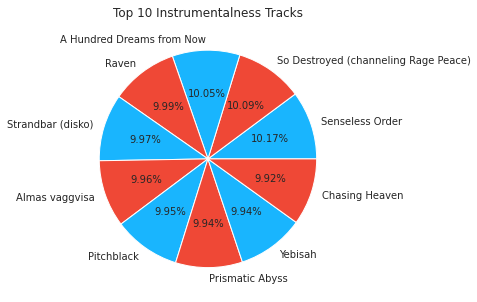

In [62]:
top_instru = df[["instrumentalness", "song_title"]].sort_values(by = "instrumentalness", ascending =False)[:10] #change :10 for any top n number
plt.figure(figsize=(5,5))
plt.pie(x="instrumentalness", data=top_instru, autopct= '%1.2f%%', labels = top_instru.song_title )
plt.title("Top 10 Instrumentalness Tracks")
plt.show()



## Histrogram Visualizations



#### Choosing color palette for visualizations

In [63]:
blue_red = ['#19B5FE','#EF4836'] 
palette = sns.color_palette(blue_red)
sns.set_palette(palette)
sns.set_style("white") 

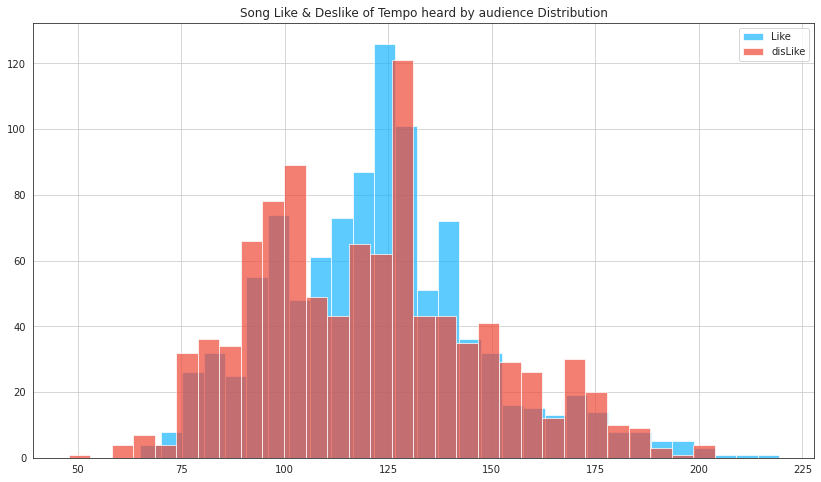

In [64]:
like = df[df['target'] == 1]['tempo']
dislike = df[df['target'] == 0]['tempo']

fig = plt.figure(figsize = (14,8))
plt.title("Song Like & Deslike of Tempo heard by audience Distribution")

like.hist(alpha = 0.7, bins = 30, label = 'Like')
dislike.hist(alpha = 0.7, bins = 30, label = 'disLike')
plt.legend(loc = "upper right")

## As per Tempo resultant graph, we can create all other characteristics' histrogram.

we are going to plot following graphs:


1.   Danceability
2.   Duration_ms
3.   Loudness
4.   Speechiness
5.   Acousticness
6.   Valance
7.   Energy
8.   Key
9.   Instrumentalness



In [65]:
pos_dance = df[df['target'] == 1]['danceability']
neg_dance = df[df['target'] == 0]['danceability']
pos_dur = df[df['target'] == 1]['duration_ms']
neg_dur = df[df['target'] == 0]['duration_ms']
pos_loud = df[df['target'] == 1]['loudness']
neg_loud = df[df['target'] == 0]['loudness']
pos_speech = df[df['target'] == 1]['speechiness']
neg_speech = df[df['target'] == 0]['speechiness']
pos_acous = df[df['target'] == 1]['acousticness']
neg_acous = df[df['target'] == 0]['acousticness']
pos_val = df[df['target'] == 1]['valence']
neg_val = df[df['target'] == 0]['valence']
pos_ene = df[df['target'] == 1]['energy']
neg_ene = df[df['target'] == 0]['energy']
pos_key = df[df['target'] == 1]['key']
neg_key = df[df['target'] == 0]['key']
pos_inst = df[df['target'] == 1]['instrumentalness']
neg_inst = df[df['target'] == 0]['instrumentalness']

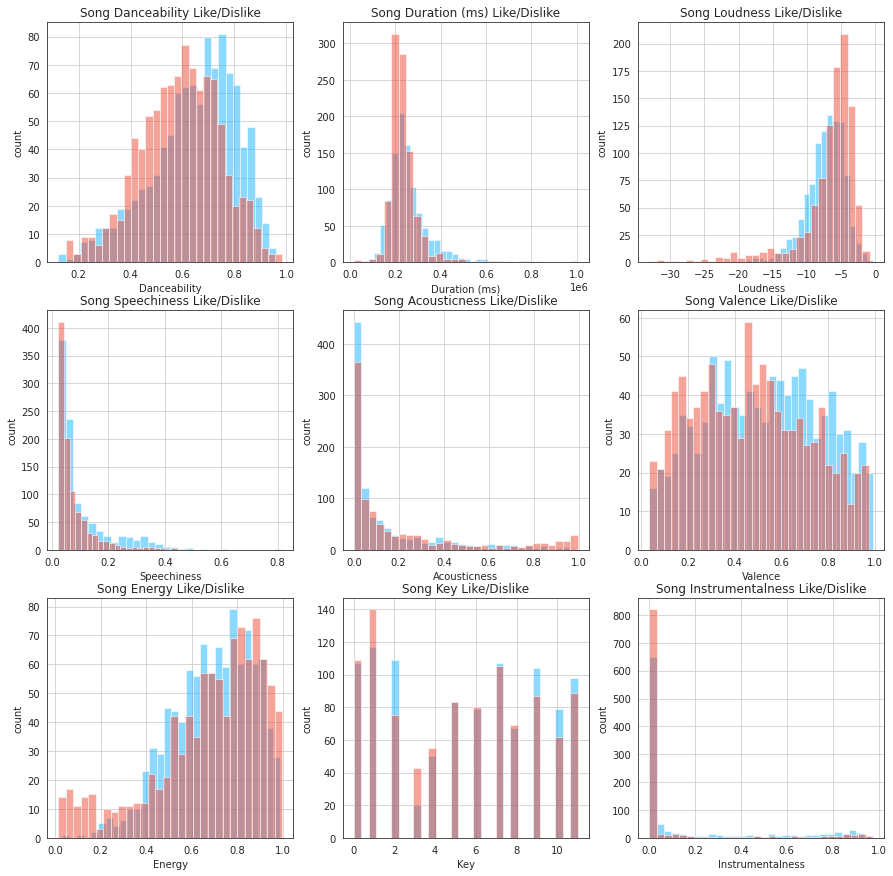

In [66]:
fig2 = plt.figure(figsize=(15,15))

# Danceability
x1 = fig2.add_subplot(331)
x1.set_xlabel('Danceability')
x1.set_ylabel('count')
x1.set_title('Song Danceability Like/Dislike')

pos_dance.hist(alpha = 0.5, bins = 30)
x2 = fig.add_subplot(331)
neg_dance.hist(alpha = 0.5, bins = 30)



# Duration (ms)
x2 = fig2.add_subplot(332)
x2.set_xlabel('Duration (ms)')
x2.set_ylabel('count')
x2.set_title('Song Duration (ms) Like/Dislike')

pos_dur.hist(alpha = 0.5, bins = 30)
x3 = fig.add_subplot(332)
neg_dur.hist(alpha = 0.5, bins = 30)


# Loudnes
x4 = fig2.add_subplot(333)
x4.set_xlabel('Loudness')
x4.set_ylabel('count')
x4.set_title('Song Loudness Like/Dislike')

pos_loud.hist(alpha = 0.5, bins = 30)
x5 = fig.add_subplot(333)
neg_loud.hist(alpha = 0.5, bins = 30)


# Speechiness
x6 = fig2.add_subplot(334)
x6.set_xlabel('Speechiness')
x6.set_ylabel('count')
x6.set_title('Song Speechiness Like/Dislike')

pos_speech.hist(alpha = 0.5, bins = 30)
x7 = fig.add_subplot(334)
neg_speech.hist(alpha = 0.5, bins = 30)


# Acousticness
x8 = fig2.add_subplot(335)
x8.set_xlabel('Acousticness')
x8.set_ylabel('count')
x8.set_title('Song Acousticness Like/Dislike')

pos_acous.hist(alpha = 0.5, bins = 30)
x9 = fig.add_subplot(335)
neg_acous.hist(alpha = 0.5, bins = 30)


# Valence
x10 = fig2.add_subplot(336)
x10.set_xlabel('Valence')
x10.set_ylabel('count')
x10.set_title('Song Valence Like/Dislike')

pos_val.hist(alpha = 0.5, bins = 30)
x11 = fig.add_subplot(336)
neg_val.hist(alpha = 0.5, bins = 30)


# Energy
x12 = fig2.add_subplot(337)
x12.set_xlabel('Energy')
x12.set_ylabel('count')
x12.set_title('Song Energy Like/Dislike')

pos_ene.hist(alpha = 0.5, bins = 30)
x13 = fig.add_subplot(337)
neg_ene.hist(alpha = 0.5, bins = 30)


# Key
x14 = fig2.add_subplot(338)
x14.set_xlabel('Key')
x14.set_ylabel('count')
x14.set_title('Song Key Like/Dislike')

pos_key.hist(alpha = 0.5, bins = 30)
x15 = fig.add_subplot(338)
neg_key.hist(alpha = 0.5, bins = 30)


# Instrumentalness
x16 = fig2.add_subplot(339)
x16.set_xlabel('Instrumentalness')
x16.set_ylabel('count')
x16.set_title('Song Instrumentalness Like/Dislike')

pos_inst.hist(alpha = 0.5, bins = 30)
x17 = fig.add_subplot(339)
neg_inst.hist(alpha = 0.5, bins = 30)

## Histrogram Visualization v2.0

In [67]:
feature_col = ["acousticness", "danceability", "duration_ms", "energy","instrumentalness", "liveness", "loudness","speechiness", "tempo", 'valence']

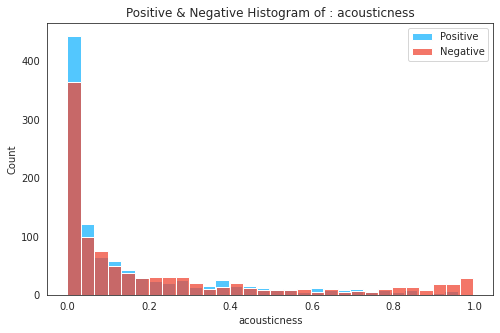

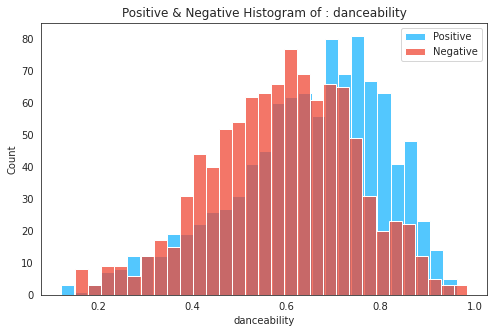

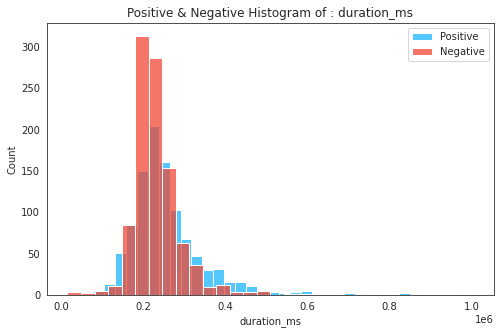

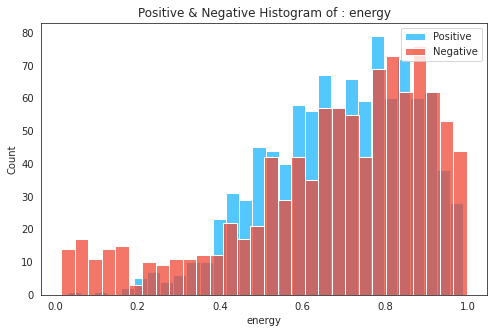

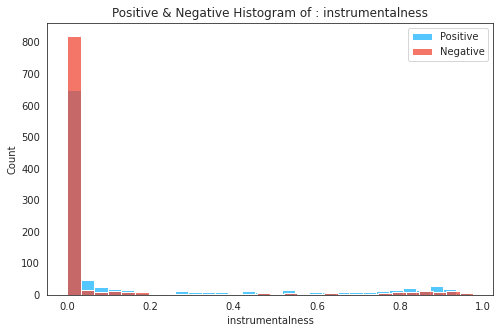

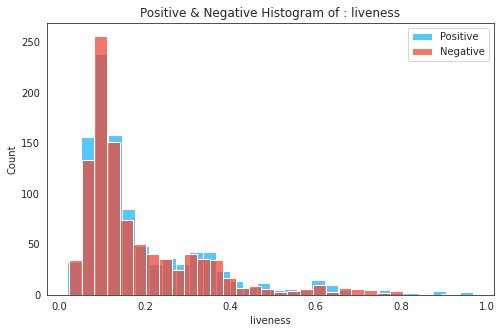

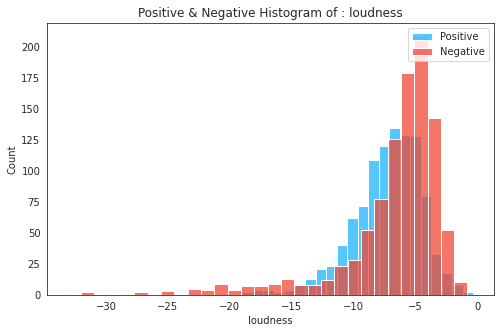

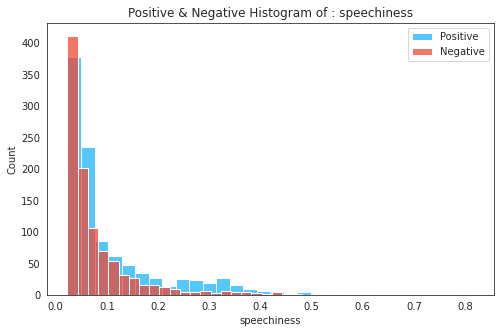

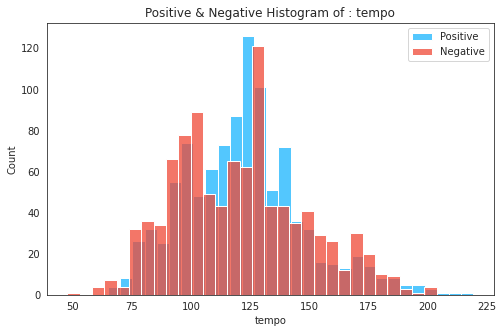

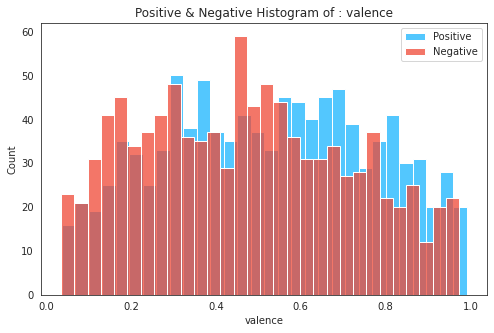

In [68]:
for col in feature_col:
    pos_data = df[df['target'] == 1][col]
    neg_data = df[df['target'] == 0][col]

    plt.figure(figsize=(8,5))

    sns.histplot(pos_data, bins= 30, label="Positive", color ='#19B5FE')
    sns.histplot(neg_data, bins= 30, label="Negative", color= '#EF4836')

    plt.legend(loc = "upper right")
    plt.title(f"Positive & Negative Histogram of : {col}")
    plt.show()

## Train & Test Data for Decision Tree

In [69]:
train, test = train_test_split(df, test_size= 0.17)

In [70]:
print("Training_DataSize= {} ; Test_Size= {}" .format(len(train), len(test)))

Training_DataSize= 1674 ; Test_Size= 343


In [71]:
c = DecisionTreeClassifier(min_samples_split = 100)

In [72]:
features = ["tempo","duration_ms","acousticness","danceability","energy","instrumentalness","key","loudness","speechiness","valence"]

In [73]:
X_train = train[features]
y_train = train["target"]

X_test = test[features]
y_test = test["target"]


In [74]:
dt = c.fit(X_train, y_train)

In [75]:
def show_tree(tree, features, path):
  f = io.StringIO()
  export_graphviz(tree, out_file=f, feature_names=features)
  pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
  img = imageio.imread(path)
  plt.rcParams["figure.figsize"] = [20,20]
  plt.imshow(img)
  
  

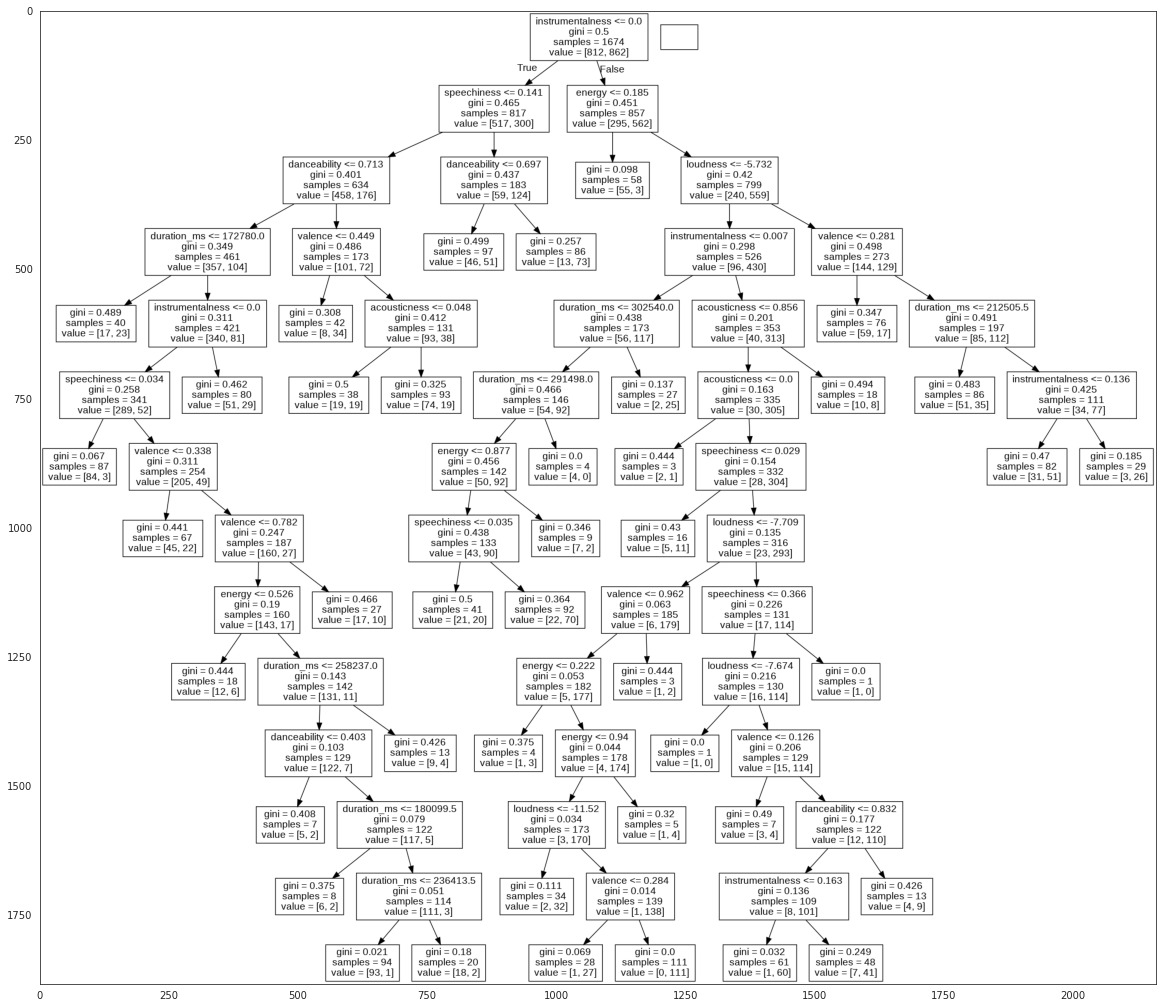

In [76]:
show_tree(dt, features, 'SongAttri_DecisionTree.png')

In [77]:
y_pred = c.predict(X_test)

In [78]:
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,

In [79]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)*100

In [80]:
print("Accuracy using Decision Tree is", round(score,1), "%")

Accuracy using Decision Tree is 72.0 %
